In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
pokemons = pd.read_csv('PokemonData.csv')

In [3]:
# создаем функцию для проверки на нормальность распределения исследуемой переменной

def norm_check(x, y):
    p = stats.shapiro(x).pvalue
    if p > y:
        return print('Распределение похоже на нормальное.\np-value =', p)
    else:
        return print('Распределение не похоже на нормальное.\np-value =', p)

In [4]:
# здоровье покемонов
hp = pokemons.HP
# атака покемонов
attack = pokemons.Attack

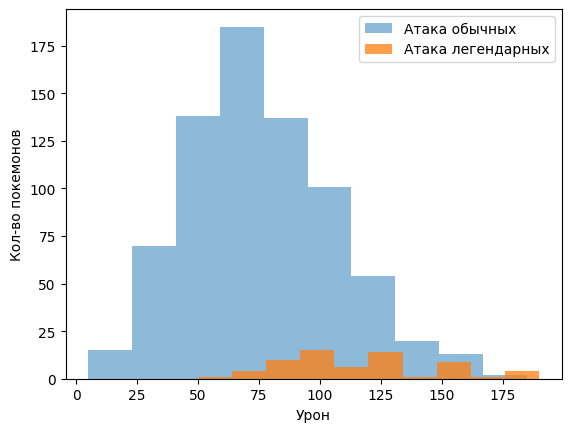

In [5]:
plt.hist(pokemons.query('Legendary == False').Attack, alpha=0.5, label='Атака обычных')
plt.hist(pokemons.query('Legendary == True').Attack, alpha=0.75, label='Атака легендарных')
plt.xlabel('Урон')
plt.ylabel('Кол-во покемонов')
plt.legend()
plt.show()

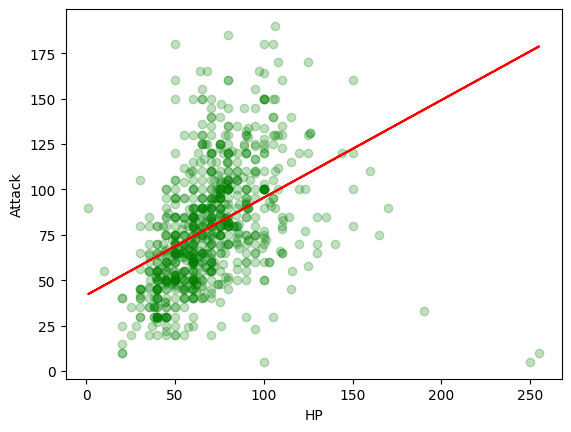

In [530]:
# Вычисление коэффициентов линейной регрессии
coefficients = np.polyfit(pokemons.HP, pokemons.Attack, 1)
slope = coefficients[0]
intercept = coefficients[1]

# Создание линейной функции
line = slope * np.array(pokemons.HP) + intercept

# Построение scatterplot и линии трендa
plt.scatter(x=pokemons.HP, y=pokemons.Attack, alpha=0.25, color='green')
plt.plot(pokemons.HP, line, color='red', label='Линия тренда')
plt.xlabel('HP')
plt.ylabel('Attack')
plt.show()

<Axes: title={'center': 'Распределение покемонов по типу 2'}, xlabel='Тип 2', ylabel='Кол-во покемонов'>

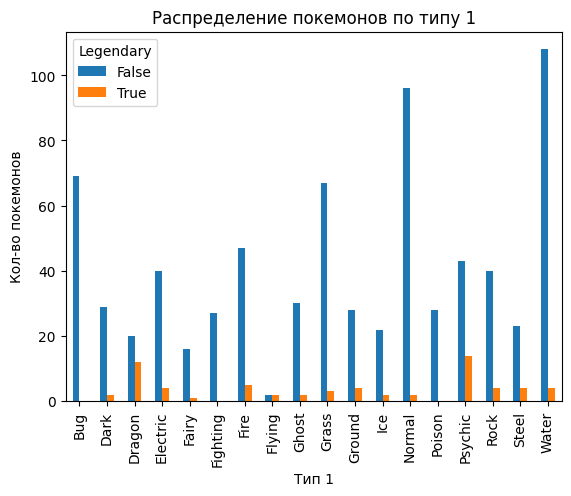

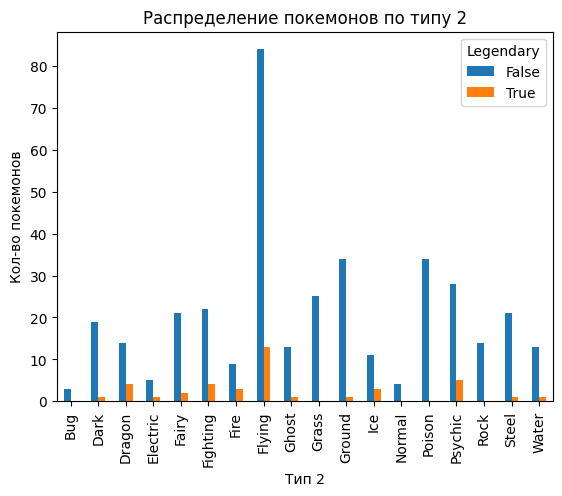

In [566]:
pokemons \
    .groupby('Legendary') \
    ['Type1'] \
    .value_counts() \
    .unstack(0) \
    .plot(kind='bar', xlabel='Тип 1', ylabel='Кол-во покемонов', title='Распределение покемонов по типу 1')

pokemons \
    .groupby('Legendary') \
    ['Type2'] \
    .value_counts() \
    .unstack(0) \
    .plot(kind='bar', xlabel='Тип 2', ylabel='Кол-во покемонов', title='Распределение покемонов по типу 2')

In [4]:
pokemons.head(3)

,Num,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


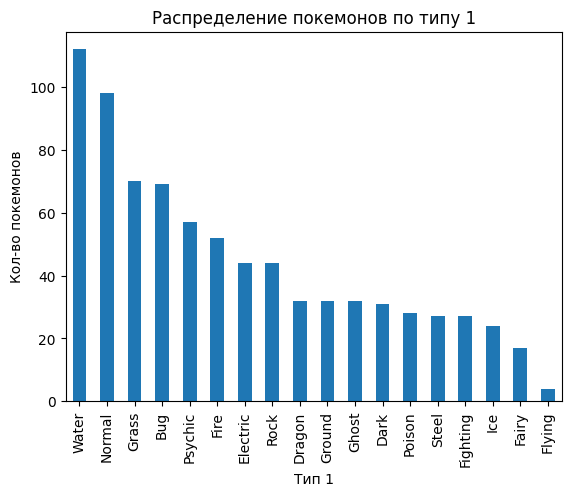

In [567]:
pokemons.Type1.value_counts() \
    .plot(kind='bar', xlabel='Тип 1', ylabel='Кол-во покемонов', title='Распределение покемонов по типу 1')
plt.show()

In [6]:
norm_check(pokemons.query('Legendary == True').Attack, 0.05)

Распределение не похоже на нормальное.
p-value = 0.03771919757127762


In [7]:
norm_check(pokemons.query('Legendary == False').Attack, 0.05)

Распределение не похоже на нормальное.
p-value = 3.185968466823397e-08


In [539]:
??plt.bar

# Тренировочный полигон

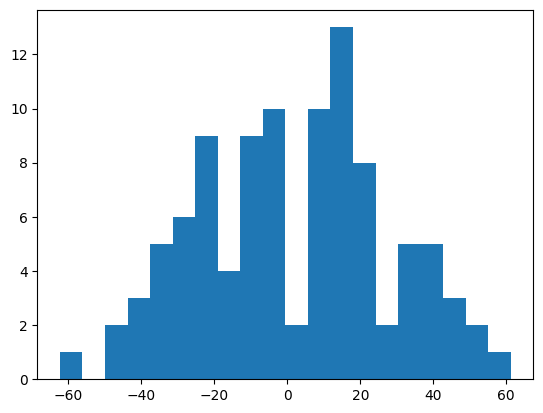

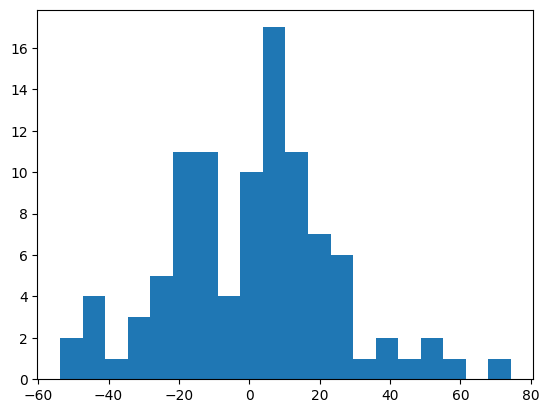

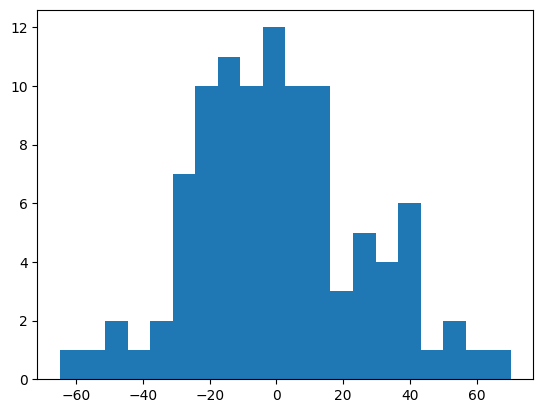

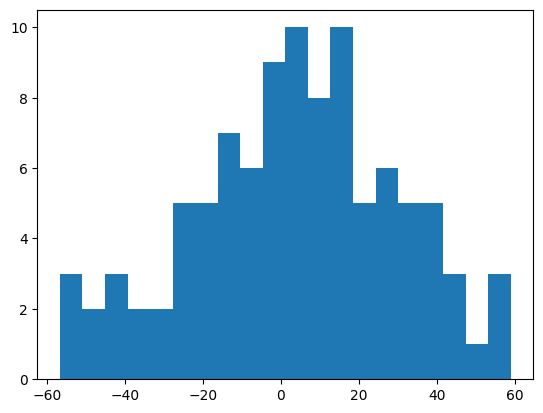

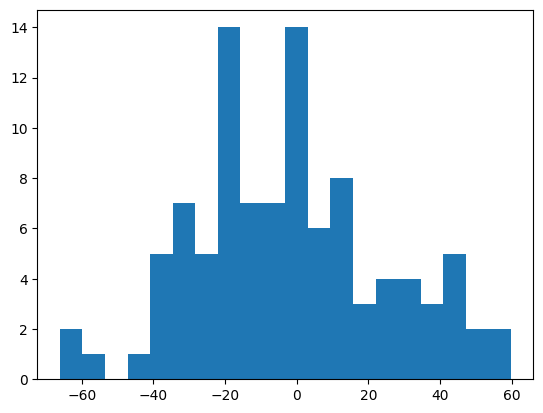

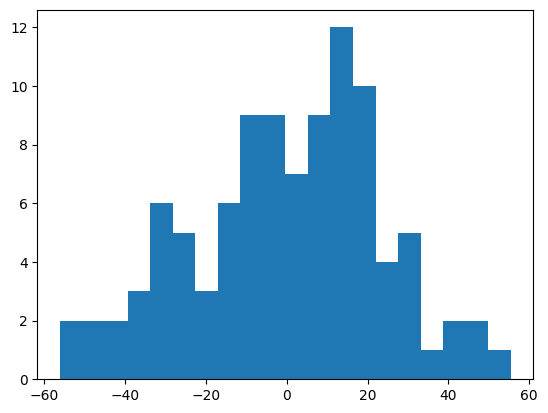

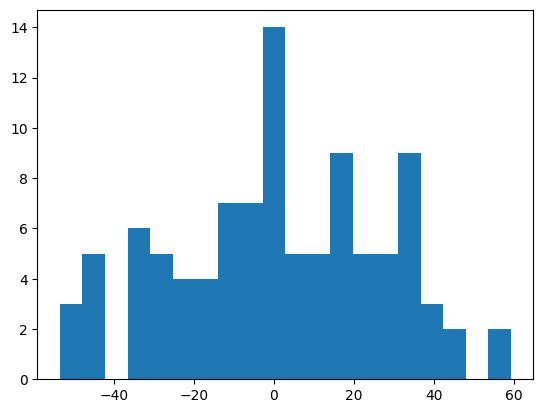

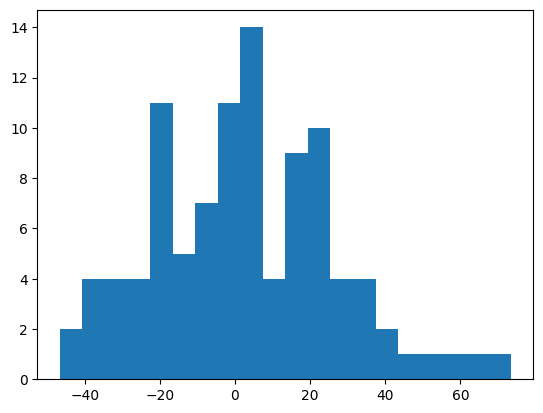

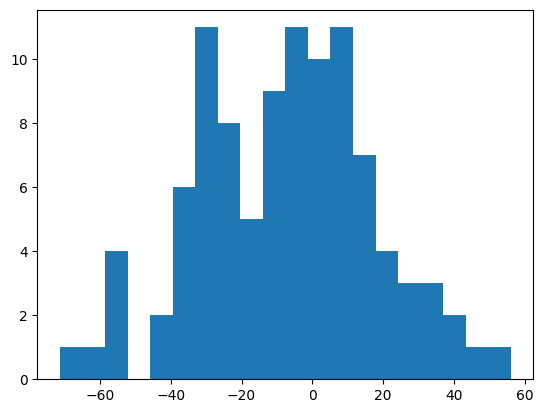

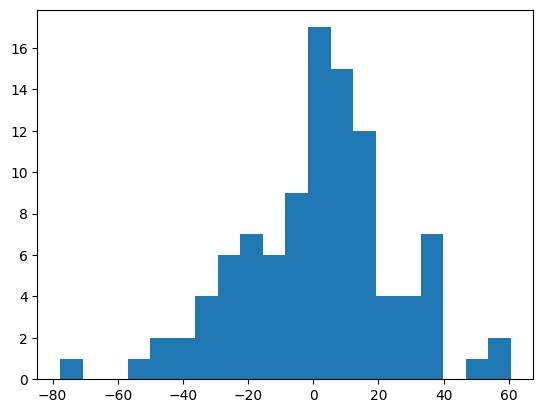

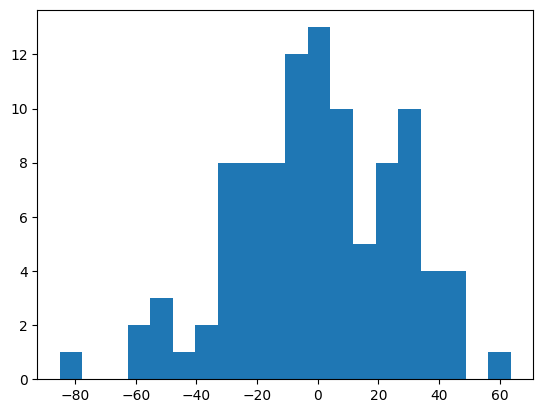

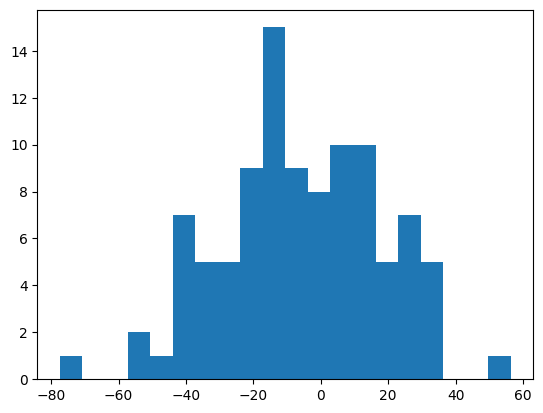

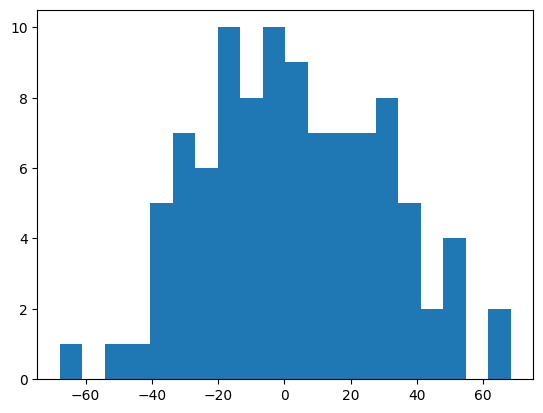

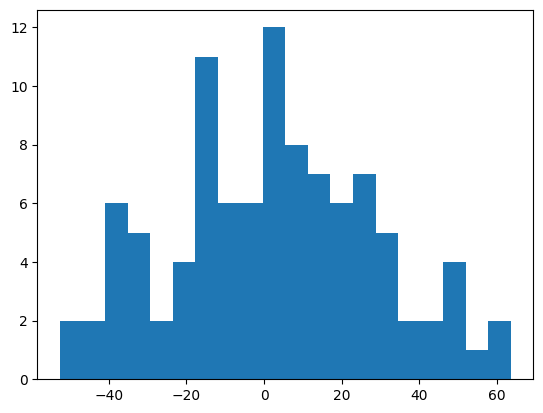

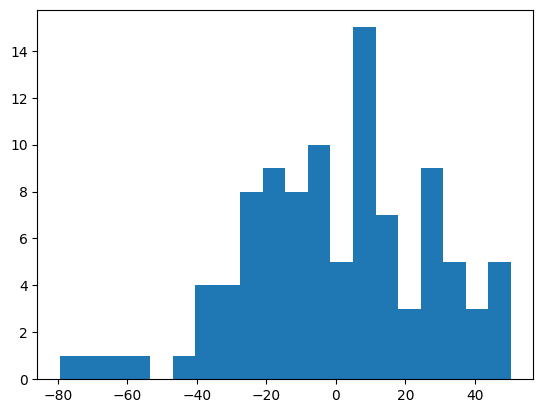

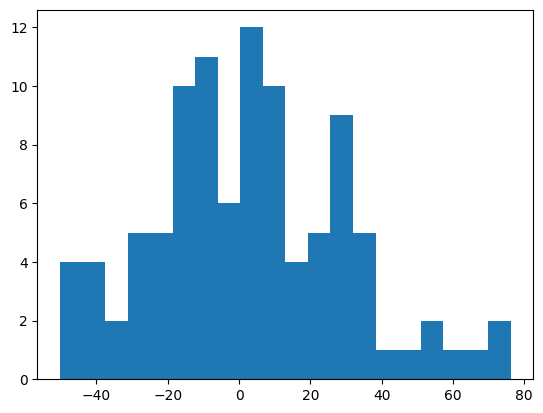

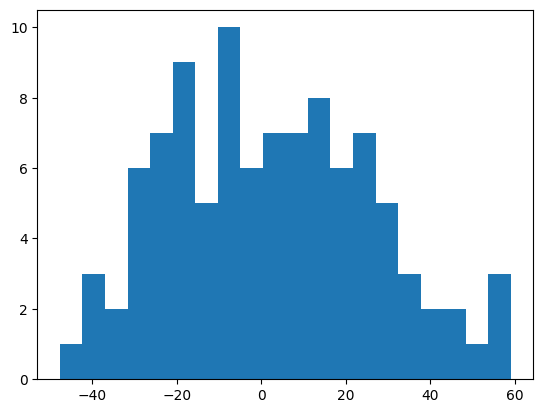

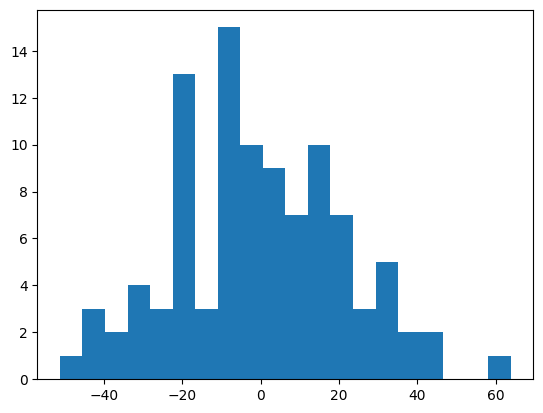

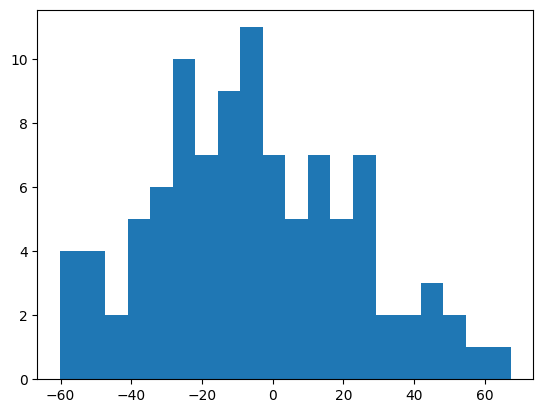

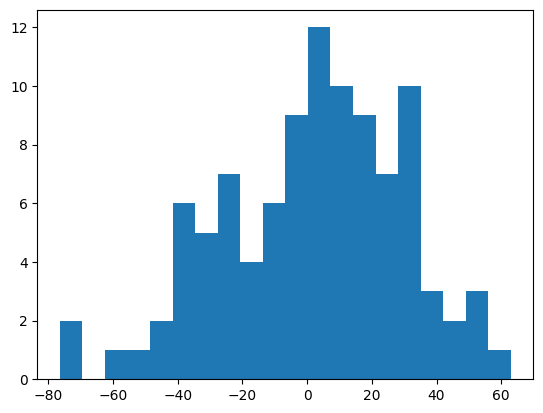

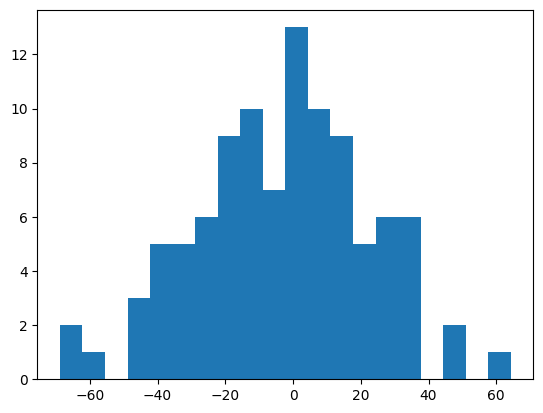

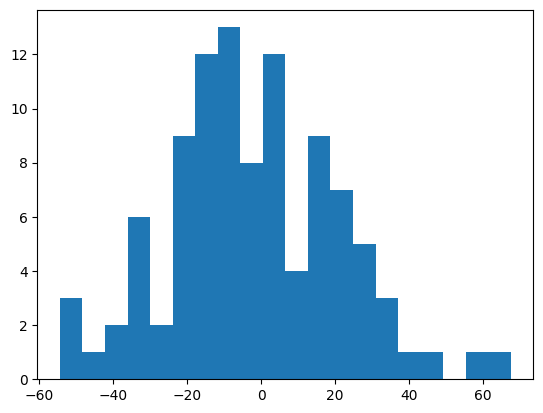

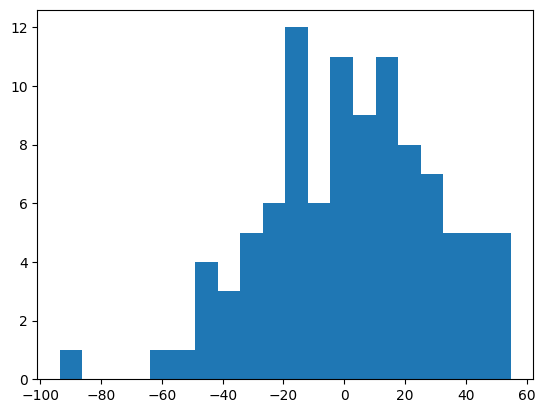

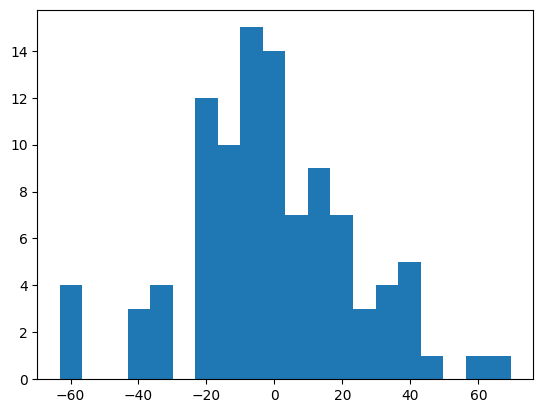

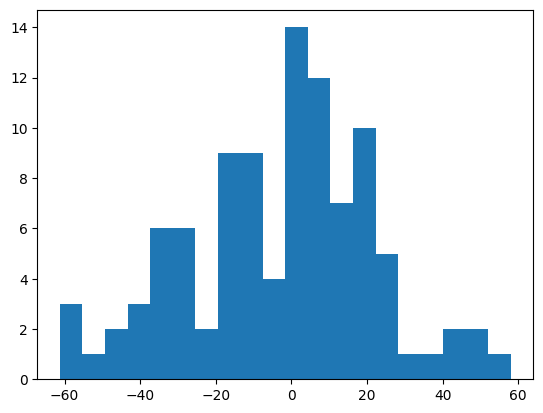

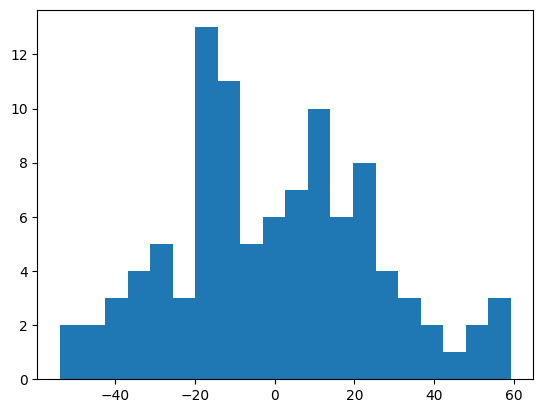

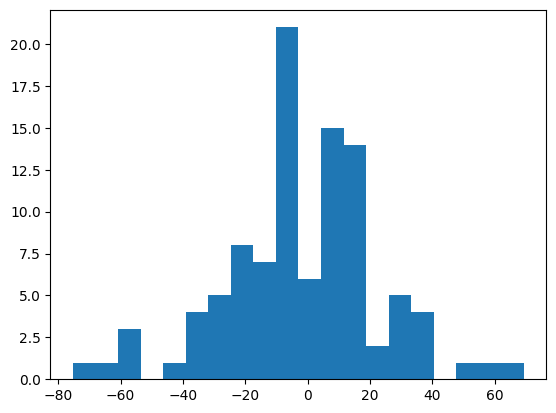

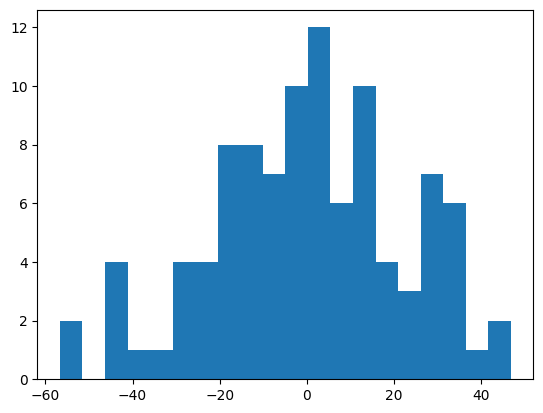

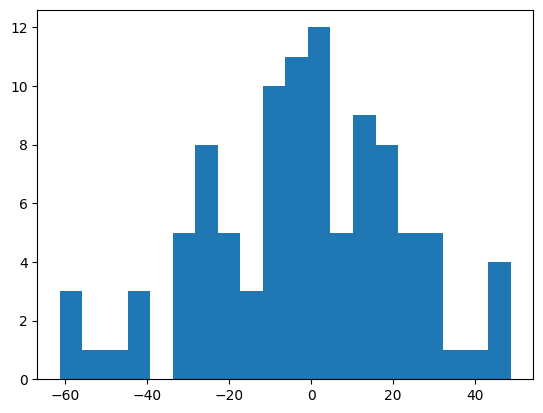

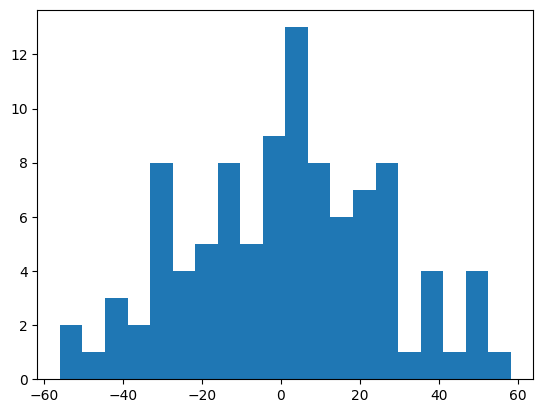

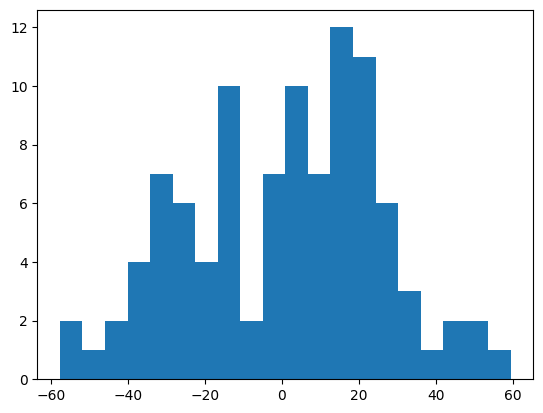

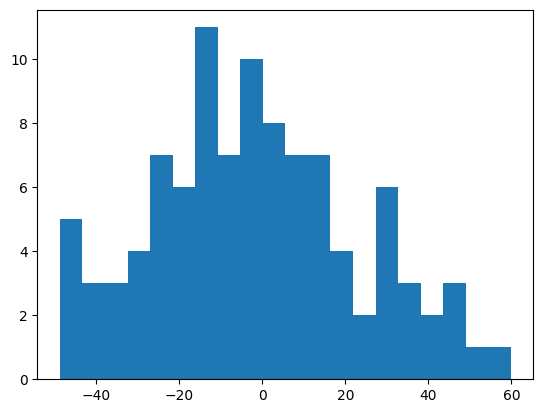

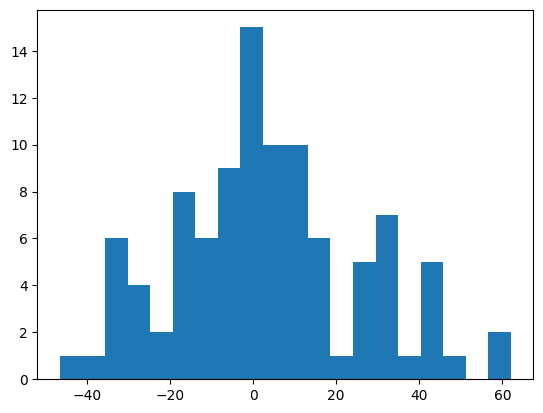

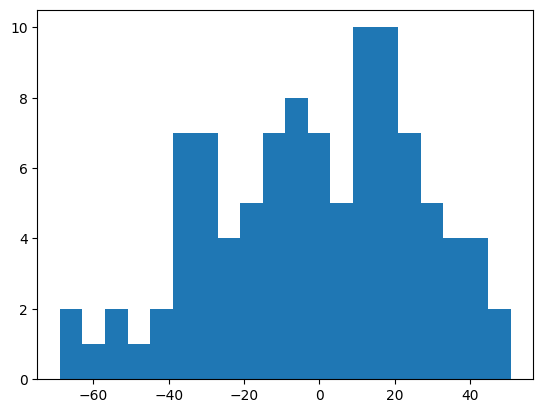

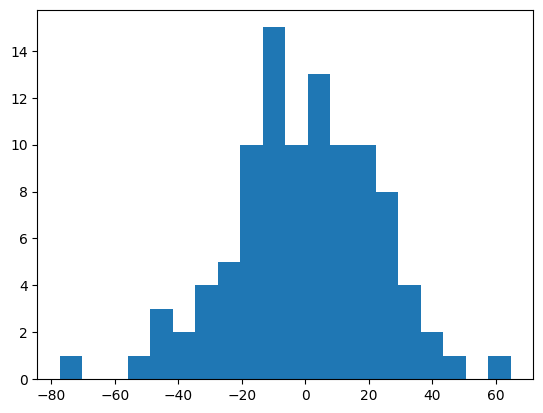

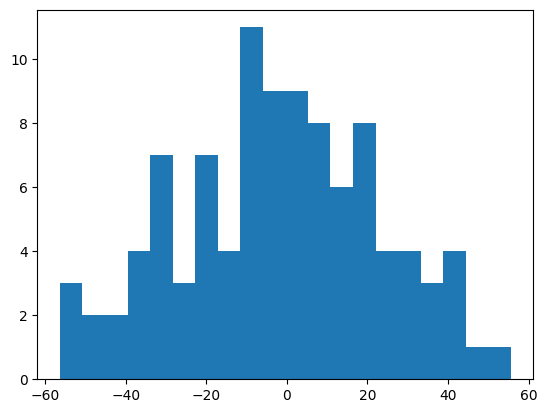

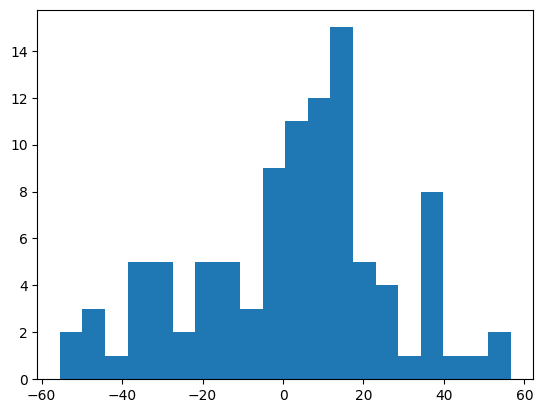

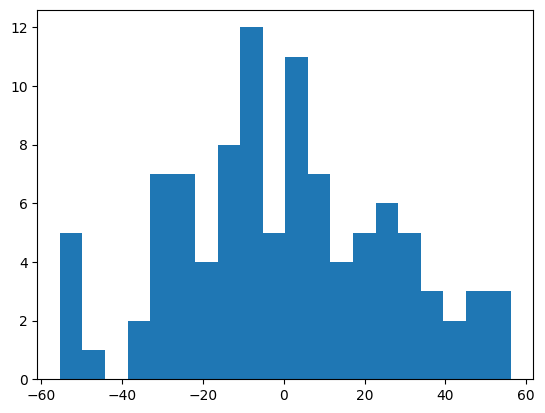

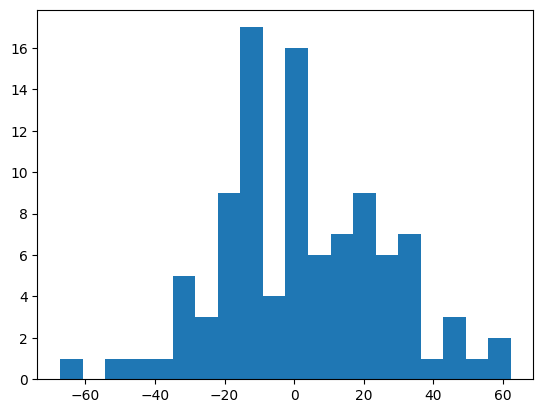

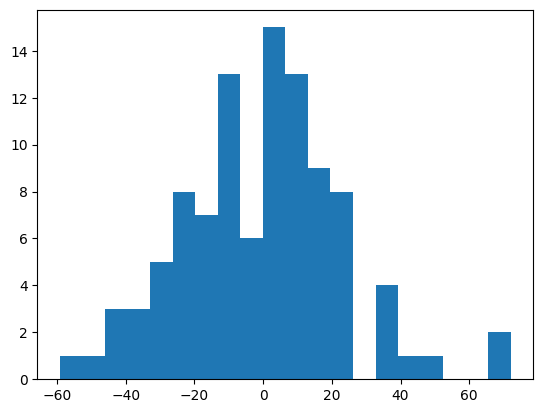

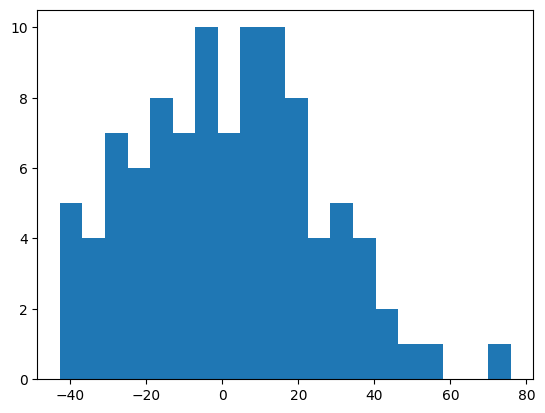

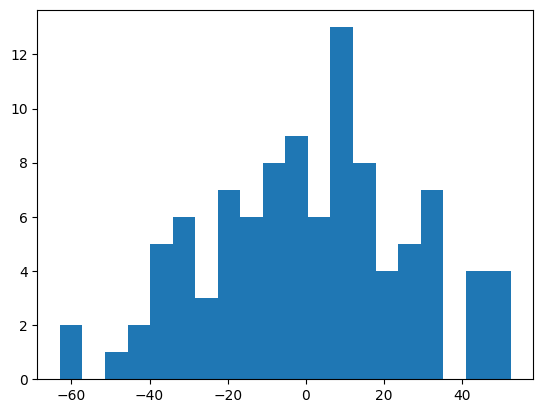

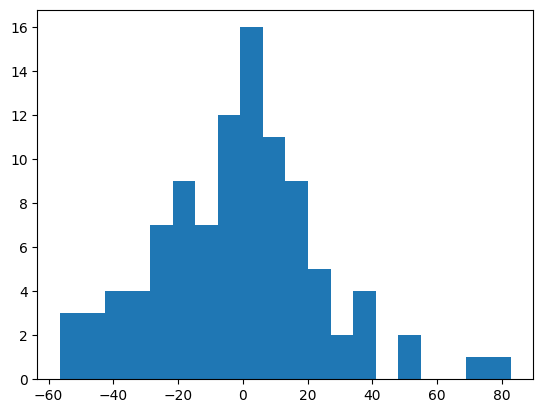

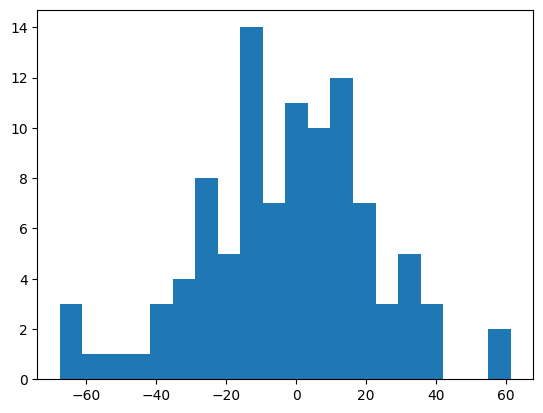

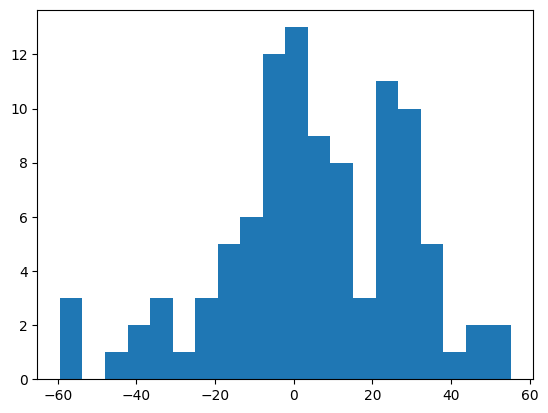

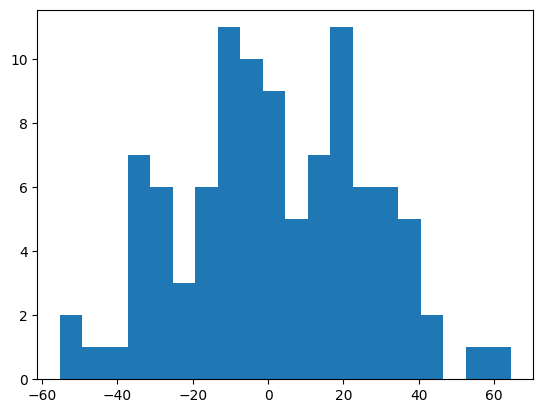

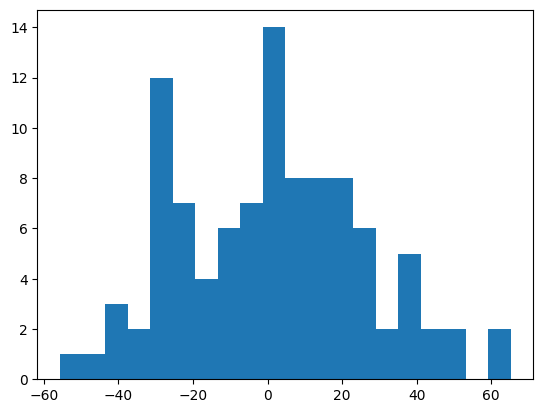

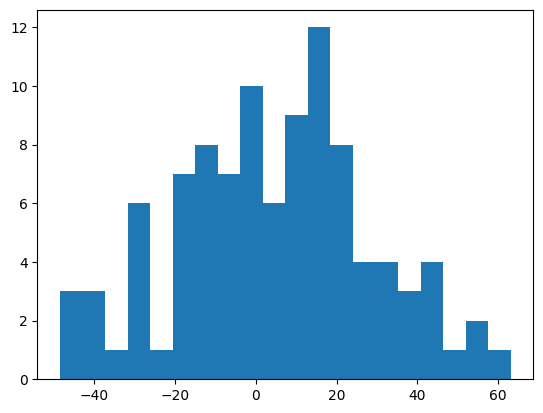

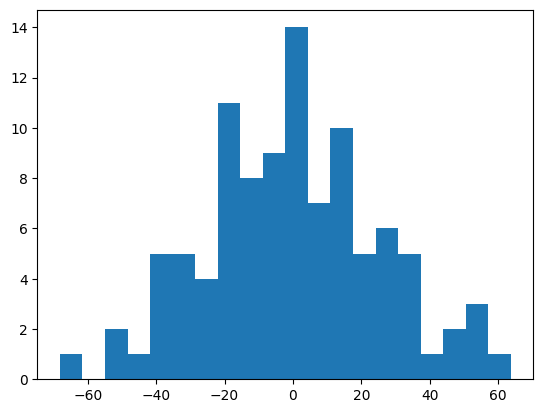

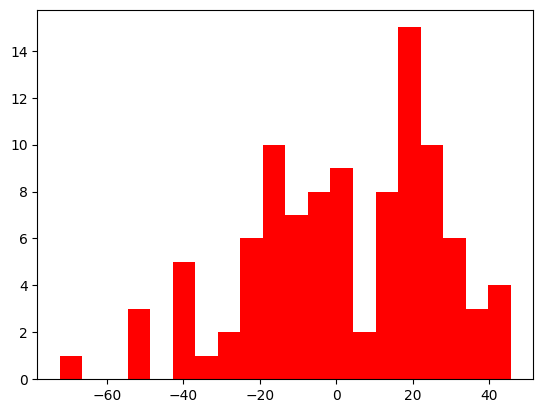

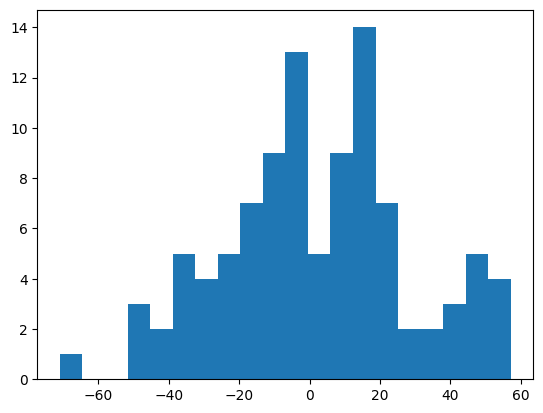

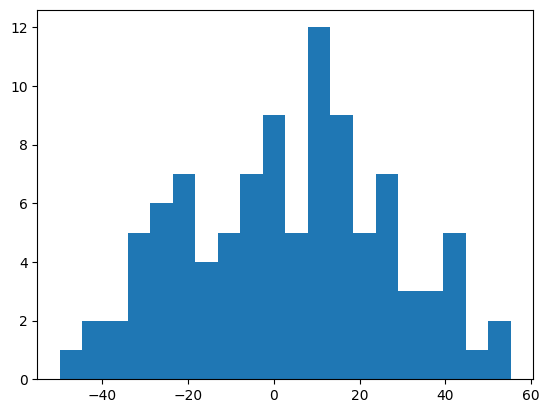

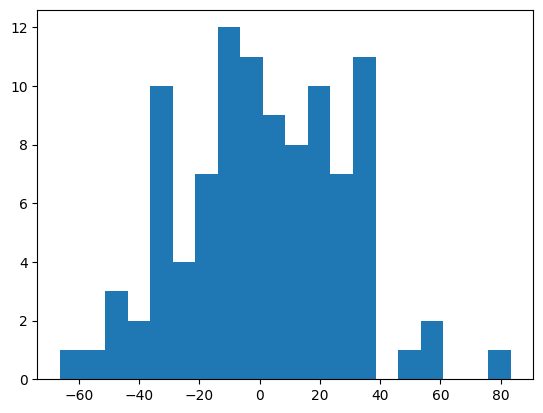

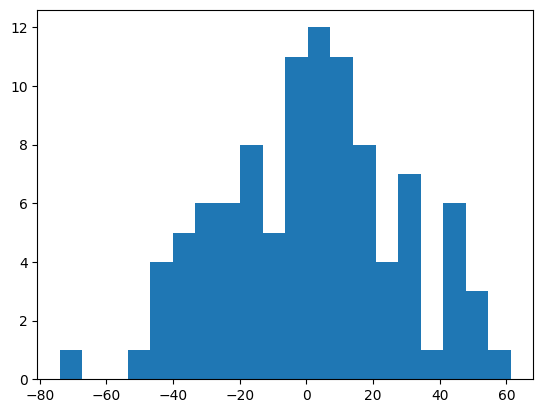

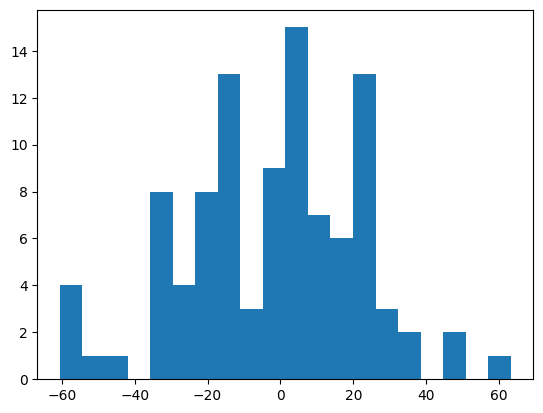

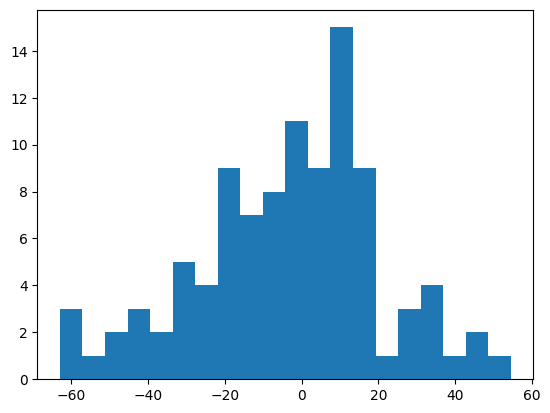

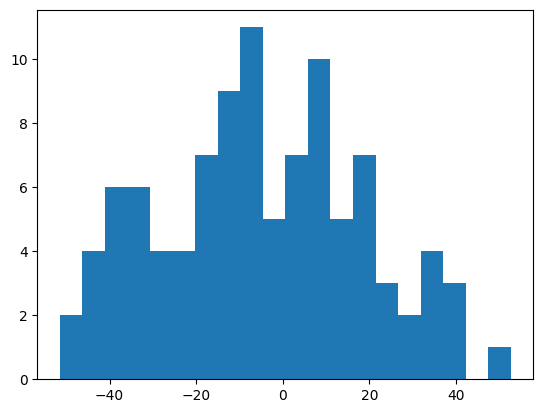

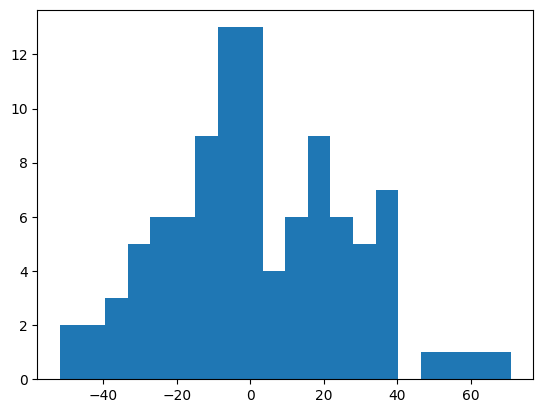

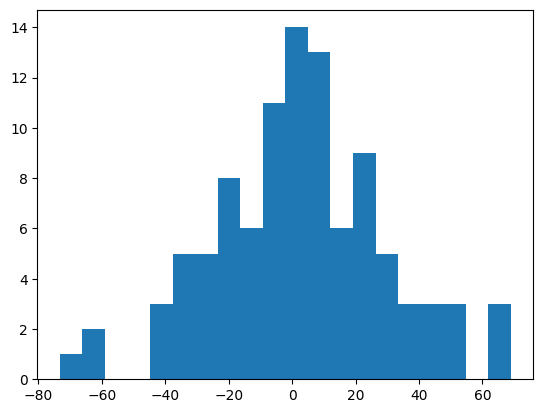

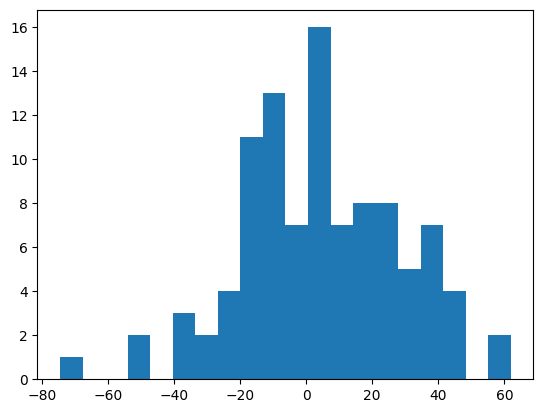

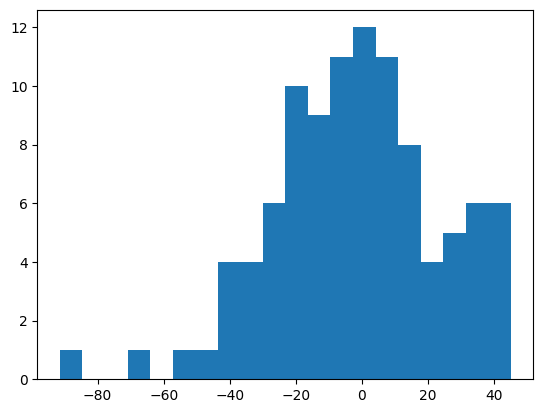

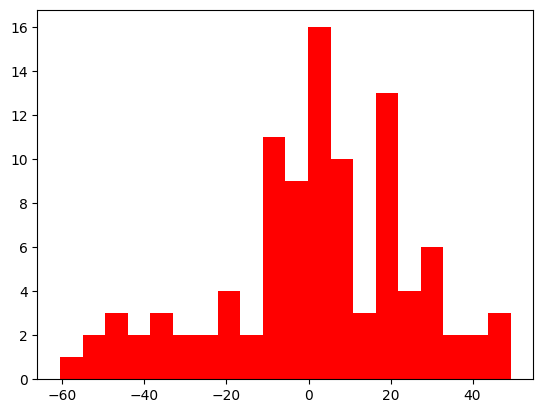

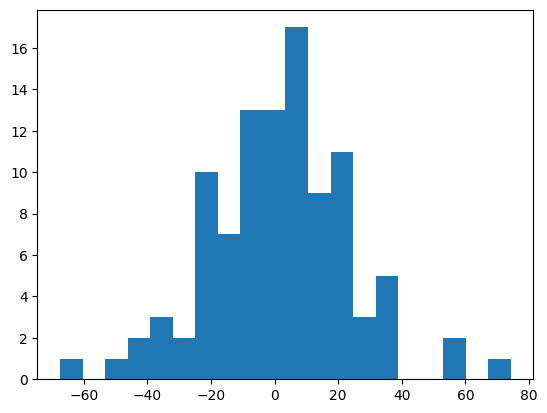

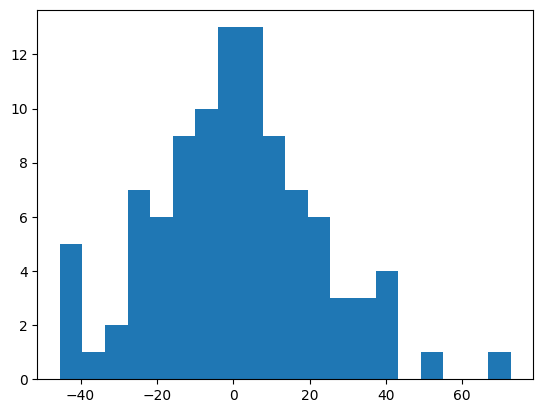

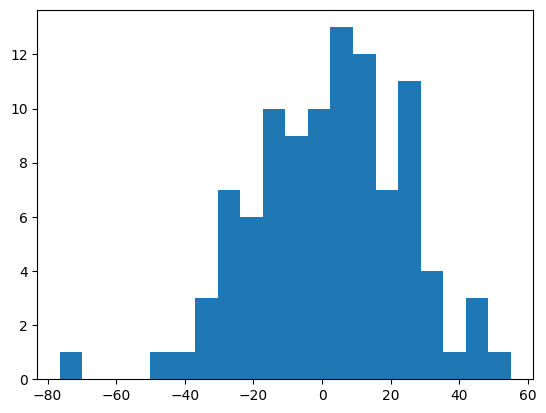

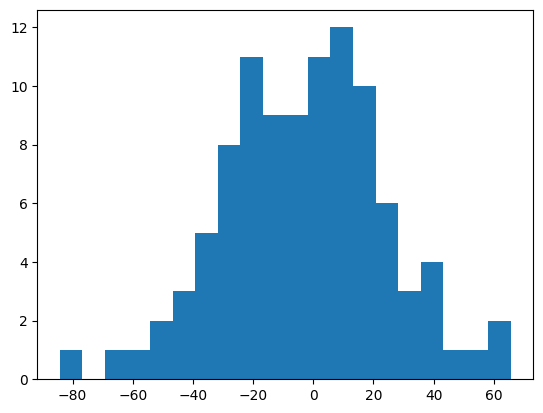

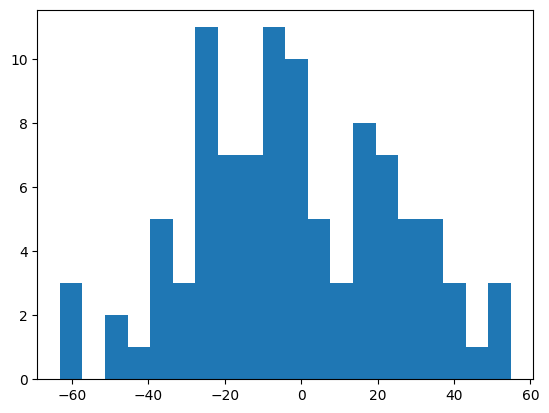

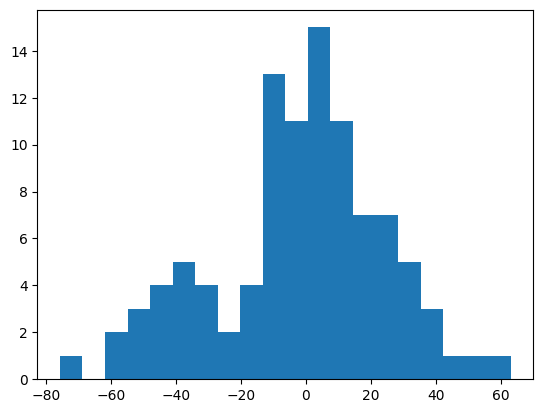

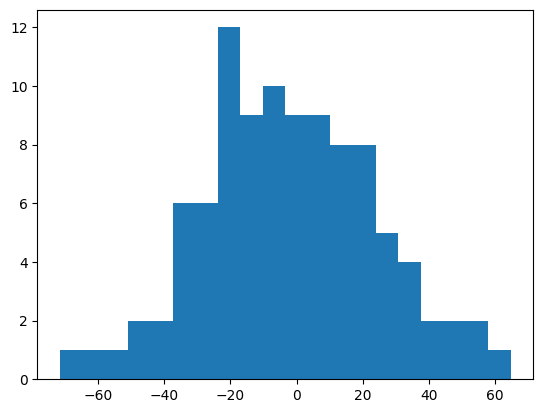

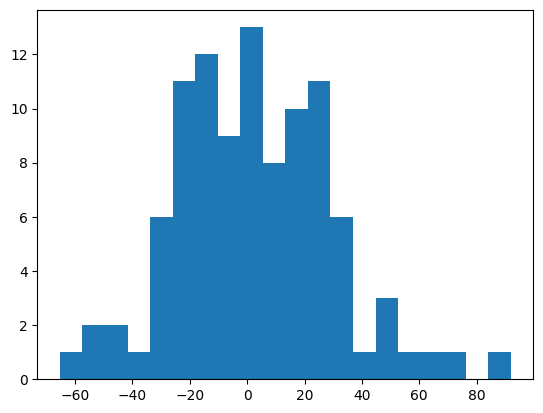

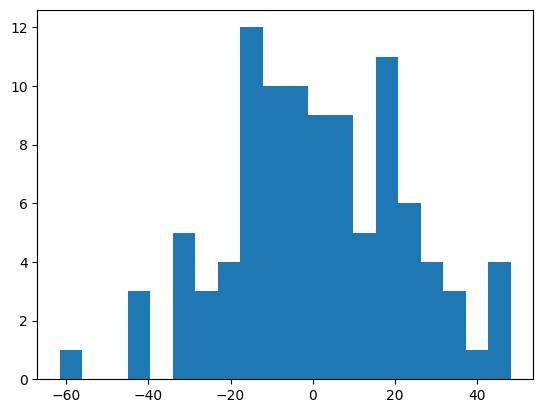

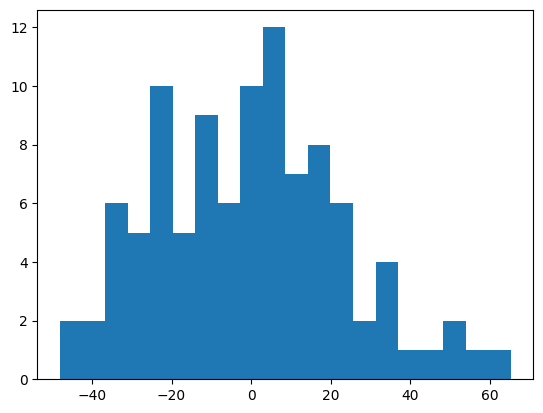

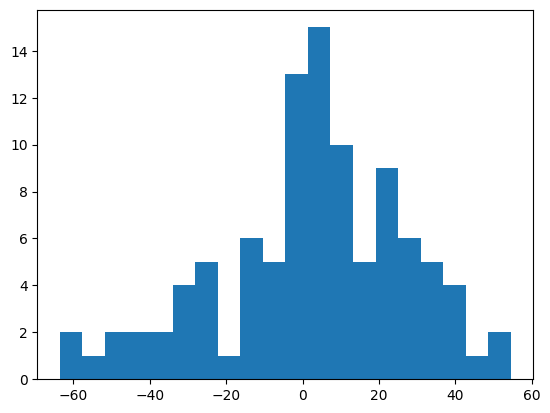

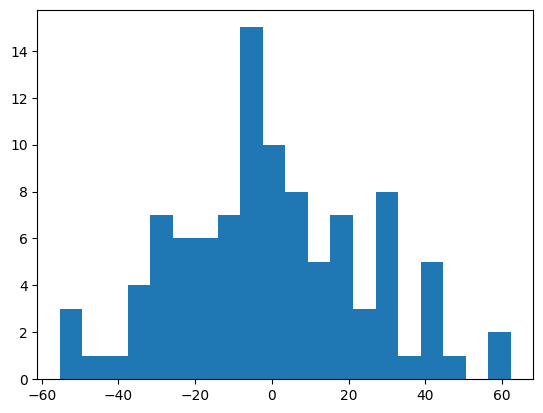

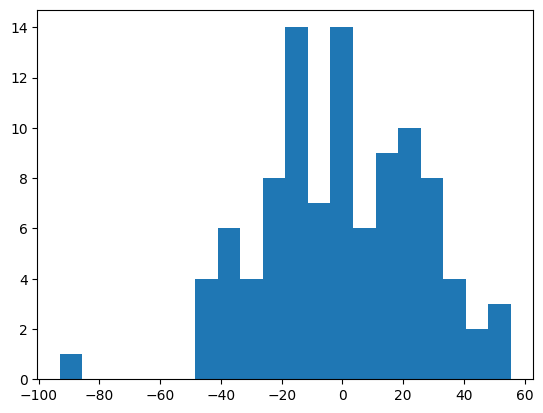

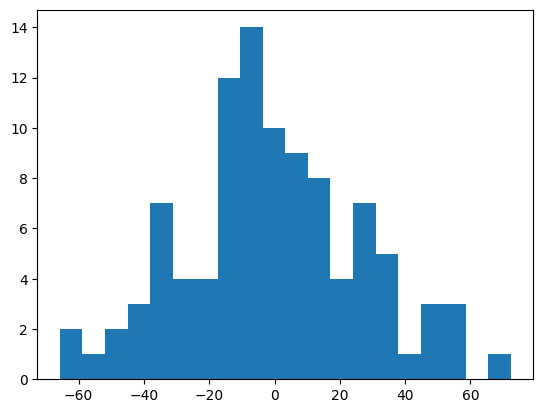

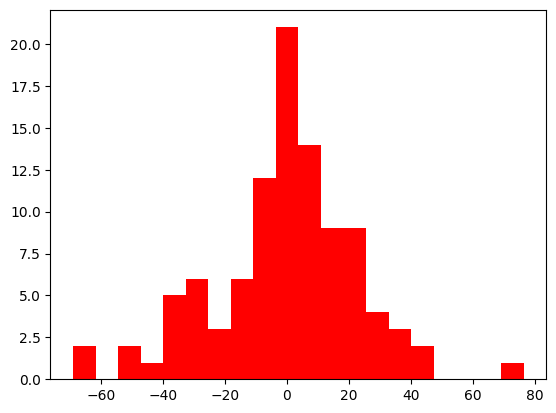

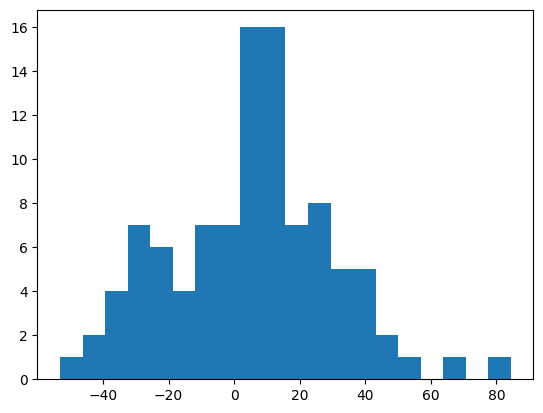

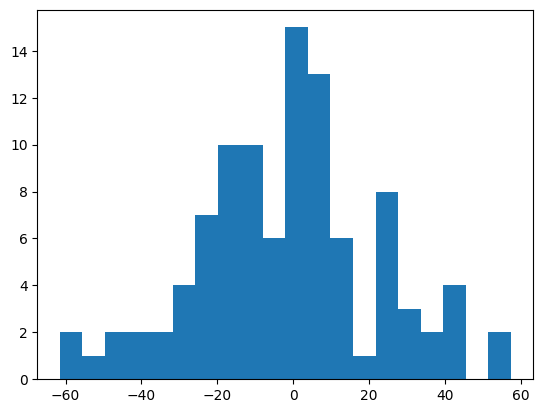

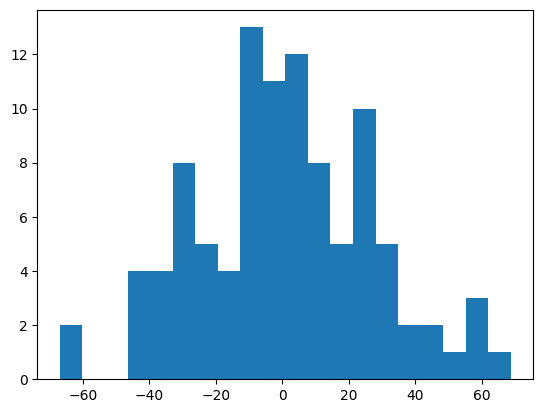

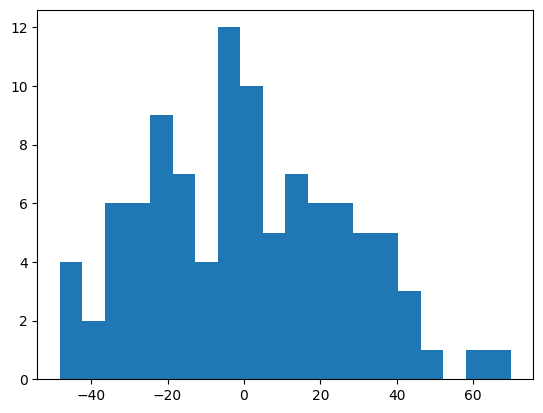

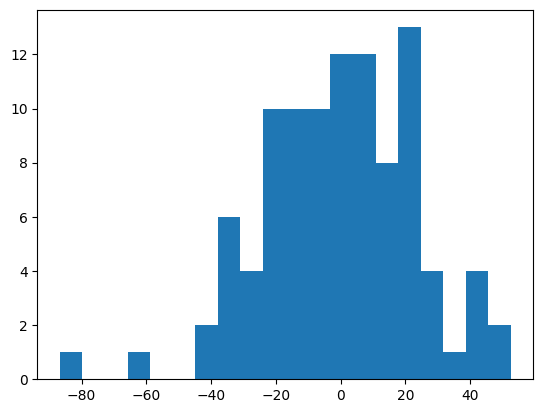

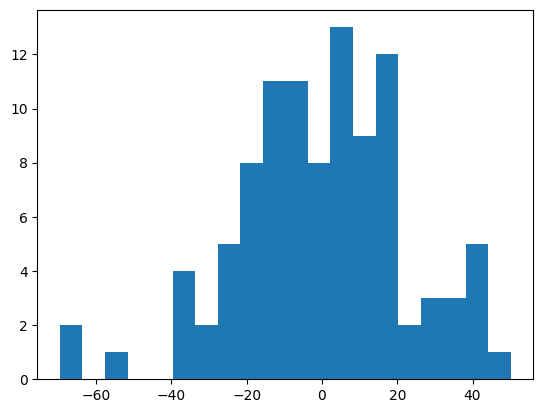

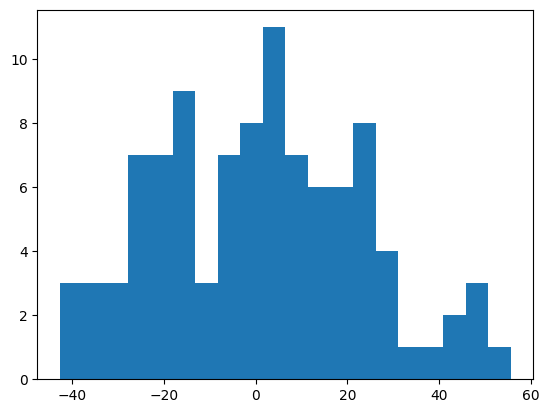

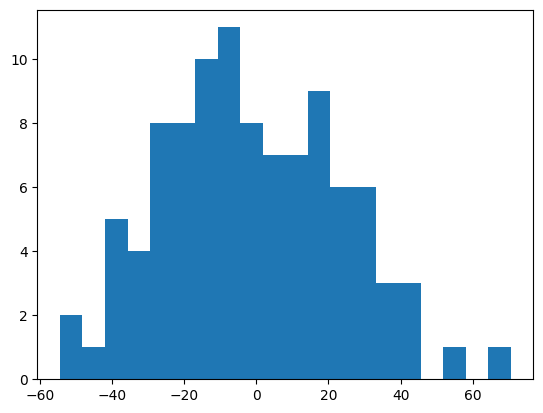

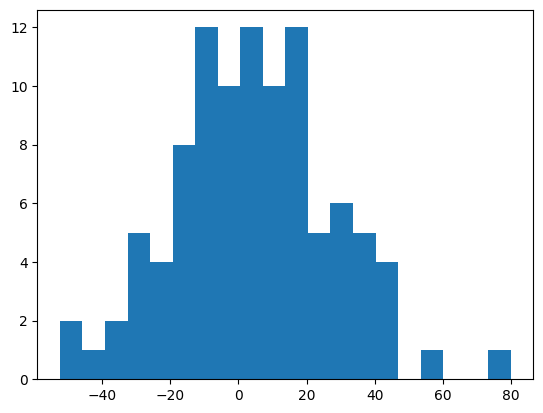

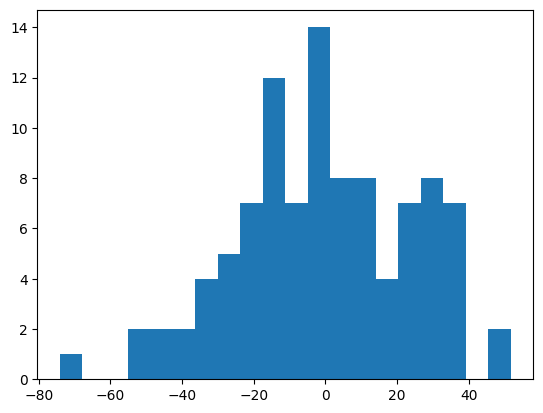

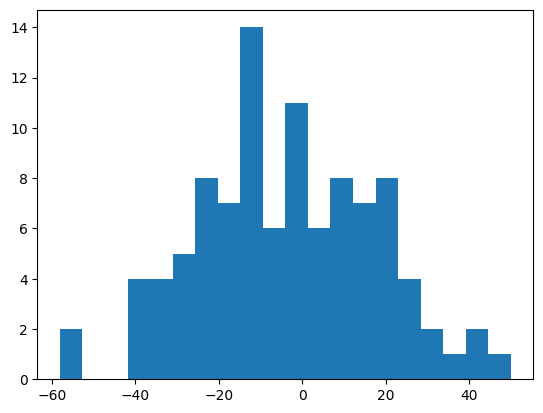

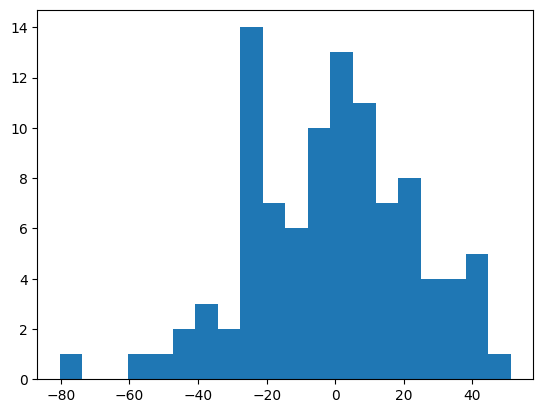

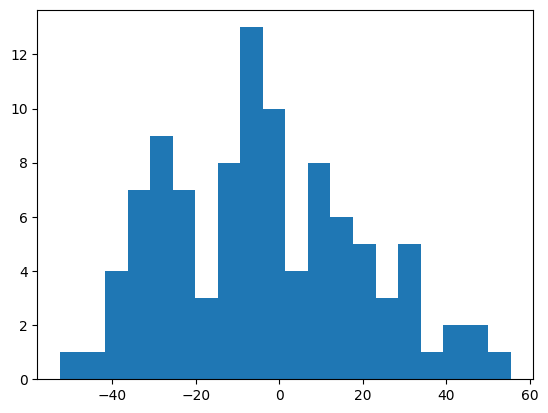

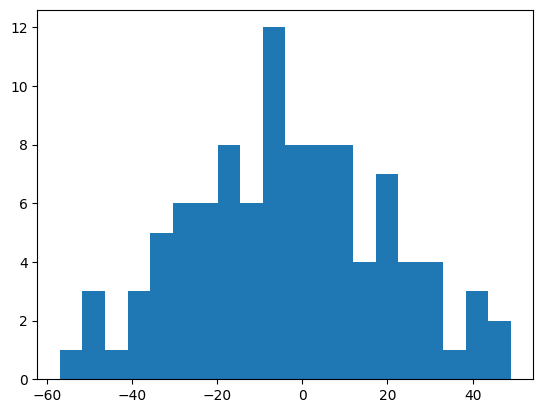

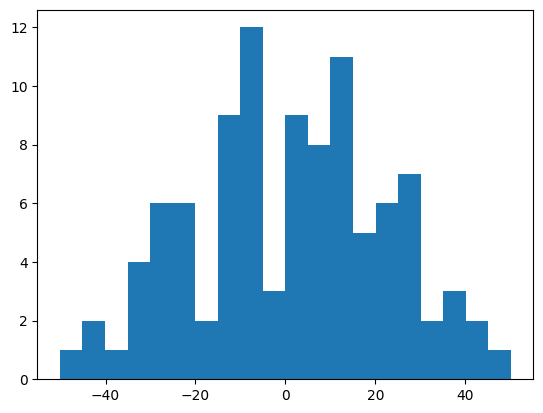

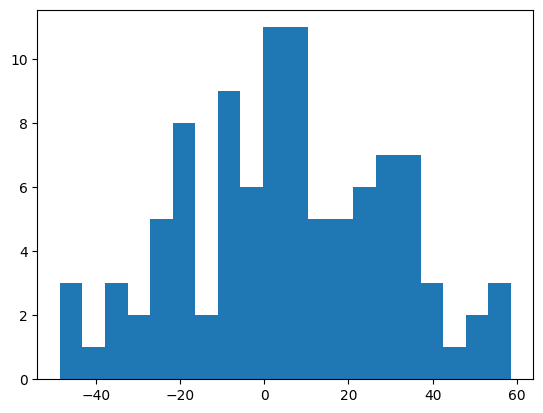

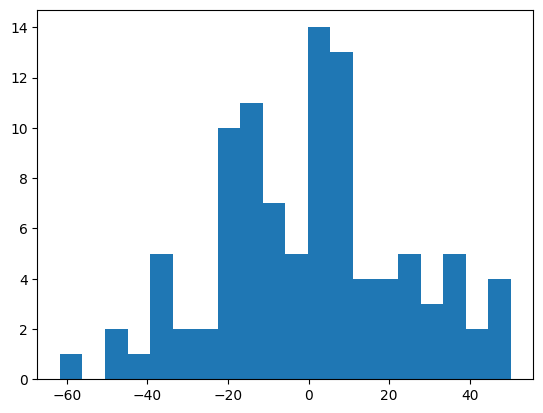

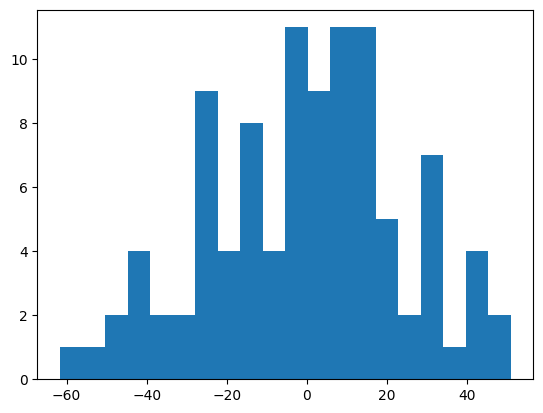

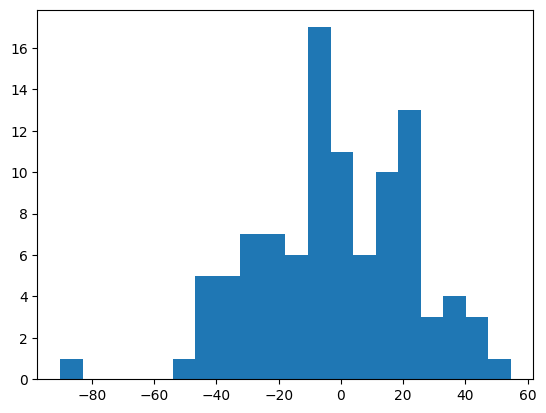

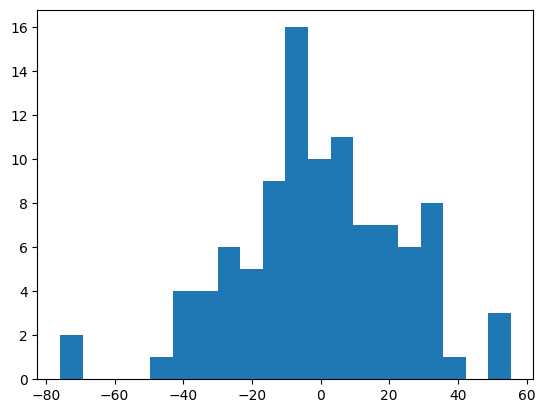

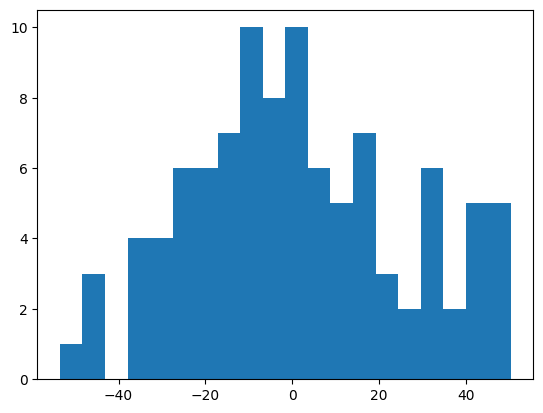

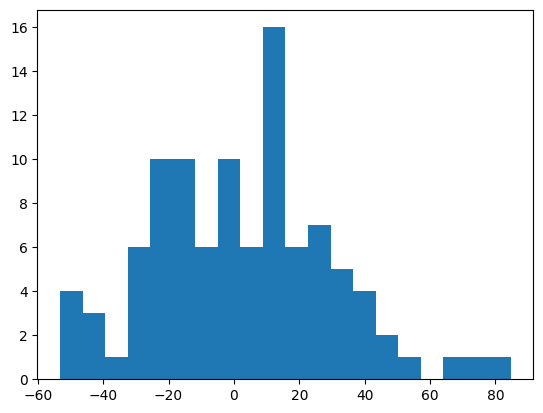

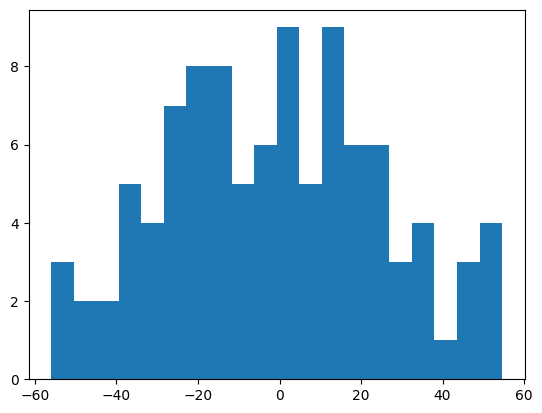

In [448]:
# изучаем как выглядят ненормальные распределения с точки зрения братана Шапиро-Уилка
# синие - нормальные
# красные - не очень

def norm_check2(x, y):
    p = stats.shapiro(x).pvalue
    if p > y:
        return 1
    else:
        return 0

for i in range(100):
    sample = np.random.normal(0, 25, 100)
    n = norm_check2(sample, 0.05)
    if n == 1:
        plt.hist(sample, bins=20)
        plt.show()
    else:
        plt.hist(sample, bins=20, color='red')
        plt.show()